# Project Title: Alien Sightings/ Are Aliens Real? 

## Team Members: Nina Bryan (ninabry), Brielle Smith (bfsmith) and Kiley Price (kileyp)

# Overview

ET. Independence Day. Toy Story. Most of us are exposed to aliens while curled up with a bowl of popcorn on our couch or in a dark theater, but others are not so lucky. For centuries, people have reported extraterrestrial activity in their backyards, on battlefields and among the woods, no longer separated by an extremely thin pane of glass or a pair of 3D glasses. From an outside perspective, the sightings of unidentified flying objects seem completely random and unexplainable, but is this truly the case? We aim to uncover the underlying trends behind alien sightings and identify patterns that correspond to these mysterious events with the intention of predicting when and where the next observation of extraterrestrial activity will occur.

# Motivation (+ Research Questions) 

Although UFO sightings date back to 1450 BC in Ancient Egypt, the first report to get significant media coverage occurred in 1947 when a man named Kenneth Arnold “claimed to see a group of nine high-speed objects near Mount Rainier in Washington while flying his small plane” $^1$. This event launched a fascination with aliens among the general public, yielding movies, posters, comics and more extraterrestrial paraphernalia as UFO reports simultaniously began to climb to a record high. Overall, 90 percent of UFO sightings can be attributed to astronomical and meteorological phenomena such as bright planets, stars, meteors, auroras, ion clouds or common objects such as balloons, bird and searchlights$^2$ yet these “mysterious” events continue to occur at seemingly stochastic and unexpected times and locations. We aim to analyze the trends of alien sightings via alternative avenues to determine what factors might best explain these patterns and ultimately attempt to predict where the next alien sighting may occur. 

Different areas of science have different explanations for UFO sightings. Medical doctors may claim that the prevalence of hallucinogenic drugs could be enabling UFO sightings.  Meteorologists argue that weather conditions such as extreme heat, fog or haze can lead to skewed visual perceptions. Psychologists suggest that sleep disorders such as sleep paralysis can prompt individuals to feel paranoid, see paranormal activity and report UFO sightings. Astronomers claim meteors, space debris and bright planets or stars can create optical illusions that lead to visual UFO reports. Political scientists propose that common fears shared among the population and political unrest may manifest itself in terrestrial anxieties and visions of flying saucers$^3$. Needless to say, there are numerous factors to explore when analyzing the patterns of alien activity.

Through our analysis, we aim to answer (pick 3)

- How are UFO sightings related to NASA meteorite landings?

- How do the time of year, location and weather conditions at the areas of sightings relate to each other?

- How are the number and locations of UFO sightings influenced by cultural trends like popular movies, comics, media, political unrest, etc.?

We will use these insights to try to predict where the next alien sighting might occur. 

# Imports

In [ ]:
import pandas as pd
import numpy as np
import time
import re
import nltk
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.colors as mcolors
import geopandas as gpd
import seaborn as sns
import os
import wget
import matplotlib.colors as mcolors
import math

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [ ]:
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter
from astral.sun import sun
from astral.geocoder import database, lookup
from datetime import datetime
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from matplotlib.ticker import FuncFormatter
from shapely.geometry import Polygon

# Read Datasets

## Dataset 1 (UFO Data)

In [ ]:
ufo_df = pd.read_csv('/work/scrubbed.csv')

/tmp/ipykernel_659/2087025884.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_df = pd.read_csv('/work/scrubbed.csv')


In [ ]:
ufo_df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


Description: This dataset is a collection of 80,332 UFO sighting reports, with an emphasis on observations from trained observers such as pilots and incidents involving anomalous structured craft observed at close proximity. It also includes cases backed by clear video or photographic evidence. The records span a wide array of variables, including 'datetime' of the sighting, 'city', 'state', 'country', 'shape' of the UFO, 'duration (seconds)' and 'duration (hours/min)' of the sighting, 'comments' on the observation, 'date posted' of the report, along with 'latitude' and 'longitude' to pinpoint the geographical location of each sighting. The 'datetime', 'latitude', and 'longitude' fields allow for a detailed temporal and spatial analysis, while 'shape', 'duration', and 'comments' offer qualitative data on the sightings' characteristics and observers' experiences. This dataset was scrubbed by the National UFO Reporting Center to remove entries with erroneous or not found location or missing time.

https://www.kaggle.com/datasets/NUFORC/ufo-sightings

## Dataset 2 (Meteorite Data)

In [ ]:
meteorite_df = pd.read_csv('/work/Meteorite_Landings.csv')

In [ ]:
meteorite_df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


Description: This comprehensive dataset, sourced from The Meteoritical Society and curated by Javier de la Torre, encompasses detailed records of all known meteorite landings. With a size of 45,716 entries, it offers a rich foundation for analysis and research. The dataset is meticulously organized into several key fields, including 'name', 'id', 'nametype', 'recclass' (type of meteorite), 'mass (g)', 'fall' (fell or found), 'year' of discovery or landing, 'reclat' (latitude), 'reclong' (longitude), and 'GeoLocation' (a combination of latitude and longitude in a tuple format). These variables provide a holistic view of each meteorite's classification, mass, the circumstances of its discovery, and precise geolocation, facilitating in-depth investigations into meteorite patterns over time and space. We can leverage this dataset to explore various intriguing questions, such as the correlation between UFO sightings and meteorite landings. By examining the temporal and geographical congruence between UFO reports and recorded meteorite falls, one can assess if there's a statistical relationship or mere coincidence.

 https://catalog.data.gov/dataset/meteorite-landings

## Dataset 3 (Movies Data)

In [ ]:
rating_df = pd.read_csv('/work/ratings.csv')

In [ ]:
rating_df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
keywords_df = pd.read_csv('/work/keywords.csv')

In [ ]:
keywords_df

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [ ]:
mov_metadata = pd.read_csv('/work/movies_metadata.csv')

/tmp/ipykernel_659/676575038.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  mov_metadata = pd.read_csv('/work/movies_metadata.csv')


In [ ]:
mov_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


This dataset offers a comprehensive overview of the movie landscape as captured by the Full MovieLens Dataset, incorporating metadata for 45,000 movies released on or before July 2017. It is a rich repository of information, detailing various aspects of each film, including cast and crew compositions, plot keywords, financial figures such as budget and revenue, visual elements like posters and backdrops, release dates, languages, production companies, and countries. Additionally, the dataset is enhanced with TMDB vote counts and average ratings, providing a multifaceted view of each movie's reception and popularity. The release of popular movies, TV shows, or books about aliens and UFOs can significantly impact public interest and beliefs regarding extraterrestrial life. These cultural products can prime individuals to interpret ambiguous aerial phenomena as UFOs, leading to a surge in sightings.

https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

## Dataset 4 (Alien Science Fiction Books) 

In [ ]:
alien_books = pd.read_csv('/work/sf_aliens.csv')

In [ ]:
alien_books

,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,Year_published,Genres,url
0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,"{'Young Adult': 3439, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/12578077-o...
1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,"{'Young Adult': 2271, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13047090-onyx
2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,"{'Young Adult': 5436, 'Science Fiction': 3327,...",https://www.goodreads.com/book/show/16101128-t...
3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,"{'Young Adult': 4529, 'Science Fiction': 4285,...",https://www.goodreads.com/book/show/1656001.Th...
4,Opal,Opal,Jennifer L. Armentrout,NaN,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,"{'Young Adult': 1855, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13362536-opal
...,...,...,...,...,...,...,...,...,...,...,...
1245,The Color of Distance,The Color of Distance,Amy Thomson,English,4.26,790,75,Juna is the sole survivor of a team of surveyo...,1995,"{'Science Fiction': 126, 'Fiction': 27, 'Scien...",https://www.goodreads.com/book/show/466371.The...
1246,Aliens: Genocide,Aliens: Genocide (Aliens),David Bischoff,English,3.63,632,32,Their queen is dead and the hive mind has been...,1993,"{'Science Fiction': 31, 'Science Fiction (Alie...",https://www.goodreads.com/book/show/2186184.Al...
1247,The Pool of Fire,The Pool of Fire,John Christopher,English,4.00,6452,277,Alternate cover edition can be found here. Wil...,1968,"{'Science Fiction': 346, 'Young Adult': 154, '...",https://www.goodreads.com/book/show/80491.The_...
1248,The Gripping Hand,The Gripping Hand (Moties #2),Larry Niven,English,3.82,10824,263,"For the safety of mankind, the aliens called M...",1976,"{'Science Fiction': 453, 'Fiction': 118, 'Scie...",https://www.goodreads.com/book/show/218453.The...


In [ ]:
apocalyptic_books = pd.read_csv('/work/sf_apocalyptic.csv')

In [ ]:
apocalyptic_books

,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,Year_published,Genres,url
0,The Road,The Road,Cormac McCarthy,English,3.97,735303,46499,"A searing, postapocalyptic novel destined to b...",2006,"{'Fiction': 10320, 'Science Fiction': 2804, 'S...",https://www.goodreads.com/book/show/6288.The_Road
1,Station Eleven,Station Eleven,Emily St. John Mandel,English,4.05,339864,40282,"Set in the days of civilization's collapse, St...",2014,"{'Fiction': 6481, 'Science Fiction': 3572, 'Sc...",https://www.goodreads.com/book/show/20170404-s...
2,The Stand,The Stand,Stephen King,English,4.34,633906,21677,This is the way the world ends: with a nanosec...,1978,"{'Horror': 8946, 'Fiction': 5609, 'Fantasy': 2...",https://www.goodreads.com/book/show/149267.The...
3,World War Z: An Oral History of the Zombie War,World War Z: An Oral History of the Zombie War,Max Brooks,English,4.01,452598,25951,The Zombie War came unthinkably close to eradi...,2006,"{'Horror': 5829, 'Fiction': 4907, 'Horror (Zom...",https://www.goodreads.com/book/show/8908.World...
4,The Passage,The Passage,Justin Cronin,English,4.03,194650,19552,IT HAPPENED FAST.THIRTY-TWO MINUTES FOR ONE WO...,2010,"{'Horror': 3239, 'Fiction': 2439, 'Science Fic...",https://www.goodreads.com/book/show/6690798-th...
...,...,...,...,...,...,...,...,...,...,...,...
1243,Raging Star,Raging Star,Moira Young,English,3.79,8169,1017,Her passion kept them alive. Now it may destro...,2014,"{'Young Adult': 279, 'Science Fiction (Dystopi...",https://www.goodreads.com/book/show/15835877-r...
1244,The Junkie Quatrain,The Junkie Quatrain,Peter Clines,English,3.74,1501,142,Four short stories. Each one's a different typ...,2011,"{'Horror': 47, 'Horror (Zombies) ': 40, 'Ficti...",https://www.goodreads.com/book/show/12484914-t...
1245,"Akira, Vol. 1",Akira 1,Katsuhiro Otomo,English,4.39,24936,911,The science fiction tale set in 2019 in Tokyo ...,1984,"{'Sequential Art (Manga) ': 1353, 'Sequential ...",https://www.goodreads.com/book/show/93371.Akir...
1246,Annabel,Annabel,Lauren Oliver,English,3.76,15877,973,"Lena's mother, Annabel, has always been a myst...",2012,"{'Young Adult': 422, 'Science Fiction (Dystopi...",https://www.goodreads.com/book/show/15820492-a...


In [ ]:
time_travel_books = pd.read_csv('/work/sf_time_travel.csv')

In [ ]:
time_travel_books

,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,Year_published,Genres,url
0,Outlander,Outlander,Diana Gabaldon,English,4.23,852563,46268,"The year is 1945. Claire Randall, a former com...",1991,"{'Historical (Historical Fiction) ': 11192, 'R...",https://www.goodreads.com/book/show/10964.Outl...
1,The Time Traveler's Wife,The Time Traveler's Wife,Audrey Niffenegger,English,3.98,1604511,47705,"A funny, often poignant tale of boy meets girl...",2003,"{'Fiction': 10255, 'Romance': 5903, 'Fantasy':...",https://www.goodreads.com/book/show/18619684-t...
2,11/22/63,Eleven twenty-two sixty-three,Stephen King,English,4.31,434183,38801,Jake Epping is a thirty-five-year-old high sch...,2011,"{'Fiction': 5134, 'Historical (Historical Fict...",https://www.goodreads.com/book/show/10644930-1...
3,Dragonfly in Amber,Dragonfly in Amber,Diana Gabaldon,English,4.32,294887,15200,From the author of Outlander... a magnificent ...,1992,"{'Historical (Historical Fiction) ': 6068, 'Ro...",https://www.goodreads.com/book/show/5364.Drago...
4,Rubinrot,Rubinrot,Kerstin Gier,German,4.09,118940,10146,"Manchmal ist es ein echtes Kreuz, in einer Fam...",2009,"{'Fantasy': 3411, 'Young Adult': 2650, 'Scienc...",https://www.goodreads.com/book/show/6325285-ru...
...,...,...,...,...,...,...,...,...,...,...,...
1243,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",2000,"{'Romance': 28, 'Science Fiction (Time Travel)...",https://www.goodreads.com/book/show/1888734.Tu...
1244,Time's Arrow,Time’s Arrow,Martin Amis,English,3.71,14934,1106,In Time's Arrow the doctor Tod T. Friendly die...,1991,"{'Fiction': 586, 'Historical (Historical Ficti...",https://www.goodreads.com/book/show/23031.Time...
1245,Time Out of Joint,Time Out of Joint,Philip K. Dick,English,3.85,11126,688,Time Out of Joint is Philip K. Dick’s classic ...,1959,"{'Science Fiction': 532, 'Fiction': 211, 'Nove...",https://www.goodreads.com/book/show/698034.Tim...
1246,Fog Magic,Fog Magic,Julia L. Sauer,English,3.88,1204,170,"Originally published in 1943, this edition fea...",1943,"{'Fantasy': 73, 'Fiction': 31, 'Childrens': 31...",https://www.goodreads.com/book/show/297891.Fog...


Description: This dataset comprises a curated collection from Goodreads, cataloging significant works across various science fiction subgenres, including alien, apocalyptic, and time travel themes. Extracted directly from Goodreads.com, it captures the essence of each book's page, excluding user reviews, and spans a historical range from Jonathan Swift's "Gulliver's Travel" (1726) to Andre Soares's "The Forerunner: A Vice Versa Series" (early 2021). While comprehensive, the dataset reflects the contributions of Goodreads users, encompassing a selection of pivotal books within the time frame rather than an exhaustive list of all key works.

Each subgenre dataset—alien_books, apocalyptic_books, and time_travel_books—encompasses approximately 1,250 to 1,248 entries, respectively. The variables included in each dataset are as follows:

- Book_Title and Original_Book_Title: Provide the title of the book, with the original title included where applicable.

- Author_Name: The author(s) of the book.

- Edition_Language: The language of the edition cataloged.

- Rating_score: The average Goodreads rating for the book.

- Rating_votes: The total number of ratings the book has received.

- Review_number: The total number of reviews posted by Goodreads users.

- Book_Description: A synopsis or description of the book's content.

- Year_published: The year the book was published.

- Genres: The genres associated with the book, as categorized by Goodreads users.

- url: The direct URL to the book's Goodreads page.

This dataset stands as a valuable resource for exploring trends, themes, and the evolution of science fiction literature over nearly three centuries.

https://www.kaggle.com/datasets/tanguypledel/science-fiction-books-subgenres

## Dataset 5 (Weather Data)

In [ ]:
weather_df = pd.read_csv('/work/city_temperature.csv')

/tmp/ipykernel_659/2432502761.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv('/work/city_temperature.csv')


In [ ]:
weather_df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


Description: This dataset encompasses a compilation of daily temperature readings from major cities around the world, amassing a total of 2,906,327 records. Each entry documents the average temperature for a given day, along with geographical identifiers and the date of the recording. The variables included are as follows:

- Region: The global region in which the city is located.

- Country: The country of the city.

- State: The state or province of the city, where applicable.

- City: The name of the city.

- Month: The month of the year for the temperature recording.

- Day: The day of the month for the temperature recording.

- Year: The year of the temperature recording.

- AvgTemperature: The daily average temperature recorded in the city, presumably in degrees Fahrenheit or Celsius (the dataset should specify the unit).

By integrating this temperature dataset with UFO sighting records, we can examine whether certain weather conditions correlate with an increase or decrease in UFO sightings. For instance, one might hypothesize that clearer skies, which correspond with specific temperature ranges, might lead to more sightings due to better visibility. Conversely, extreme weather conditions could either deter outdoor activities, reducing the number of potential observers, or contribute to misidentifications of natural or man-made objects as UFOs.

https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

# Data Summary

The integration of these diverse datasets—UFO sightings, meteorite landings, cultural media (movies and books), and daily temperature records—offers a multidimensional framework for exploring the intersection of natural phenomena, cultural influences, and environmental factors on the reporting and perception of UFO sightings. 

1. UFO Sightings and Meteorite Landings: The dataset containing detailed records of meteorite landings can be directly compared with UFO sightings data to investigate any temporal and spatial correlations. By mapping UFO sightings against the dates and locations of meteorite falls, we can assess whether the visibility of meteorite events influences the frequency or geographical distribution of UFO reports. This could reveal patterns suggesting whether some UFO sightings might be attributable to misidentified meteorite events.

2. Cultural Influence on UFO Sightings: The datasets from Goodreads and MovieLens, which catalog significant works of science fiction and movies, respectively, provide a cultural context for UFO sightings. By analyzing the timing and popularity of science fiction themes in literature and film, particularly those involving aliens or space travel, we can explore how these cultural products might prime the public to report UFO sightings. Increases in UFO reports might coincide with the release of popular science fiction movies or books, suggesting a media influence on public awareness and interpretations of unexplained aerial phenomena.

3. Weather Conditions and UFO Sightings: The comprehensive dataset of daily temperature readings across major cities worldwide allows for an examination of environmental conditions at the time of UFO sightings. We can analyze whether certain weather conditions, such as clear skies or temperature anomalies, correlate with an increase in UFO sightings. This could indicate whether optimal viewing conditions contribute to the likelihood of observing and reporting UFOs or if extreme weather might lead to more misidentifications of natural or human-made objects as extraterrestrial spacecraft.

# Data Cleaning/ Missing Data

In [ ]:
# Drop rows where 'datetime' column has NaN in ufo_df
ufo_df.dropna(subset=['datetime'], inplace=True)

In [ ]:
# Drop rows where 'year' column has NaN in meteorite_df
meteorite_df.dropna(subset=['year'], inplace=True)

In [ ]:
# Drop rows where 'Year_published' column has NaN in alien_books
alien_books.dropna(subset=['Year_published'], inplace=True)

## Correct Format of 'Datetime' Column in UFO dataframe

In [ ]:
# Replace "24:00" with "00:00" and convert to datetime
ufo_df['datetime'] = ufo_df['datetime'].str.replace('24:00', '00:00')

# Convert to datetime, errors='coerce' will turn problematic strings into NaT (Not a Time)
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'], errors='coerce')

# After conversion, add one day to the dates that were originally "24:00" to correct the day
# We identify these by the time being exactly "00:00"
ufo_df.loc[ufo_df['datetime'].dt.time == pd.Timestamp('00:00:00').time(), 'datetime'] += pd.Timedelta(days=1)

# Data Manipulation

## One Hot Encoding (UFO Shape) 

In [ ]:
# One-hot encode the 'shape' column in ufo_df
ufo_df_encoded = pd.get_dummies(ufo_df, columns=['shape'])

In [ ]:
# If you want to prefix the new columns to make them easily identifiable, you can do so like this:
ufo_df_encoded = pd.get_dummies(ufo_df, columns=['shape'], prefix='shape')

In [ ]:
ufo_df = pd.get_dummies(ufo_df, columns=['shape'], prefix='shape')

## Create Column (Time Between Occurance and Report Posted)

This code is converting the 'datetime' and 'date posted' columns in the ufo_df DataFrame to datetime objects, calculating the number of days between these dates, and then filtering out any records where 'date posted' is earlier than 'datetime'.

In [ ]:
# Step 1: Convert both columns to datetime format
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'])
ufo_df['date posted'] = pd.to_datetime(ufo_df['date posted'], format='%m/%d/%Y')

# Step 2: Calculate the number of days between 'datetime' and 'date posted'
ufo_df['days_between'] = (ufo_df['date posted'] - ufo_df['datetime']).dt.days

# Step 3: Remove entries where 'date posted' is earlier than 'datetime'
ufo_df = ufo_df[ufo_df['days_between'] >= 0]

## Rename Longitude Column in UFO Data

In [ ]:
ufo_df.rename(columns={'longitude ': 'longitude'}, inplace=True)

## Convert Location to Latitude and Longitude in Weather Data and Meterorite Data

### Weather Data

**DISCLAIMER: Converting Location (City Name, State Name, Country Name) to new Latitude and Longitude columns using Nominatim geolocator is currently not working, but this is the method we would like to use.**

In [ ]:
# Initialize the geocoder
geolocator = Photon(user_agent="measurements")

# To avoid hitting the service too hard, wrap the geocoder call in a rate limiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [ ]:
# Function to apply geocoding
def geocode_location(row):
    # Construct an address from the row, you can adjust the format as needed
    address = f"{row['City']}, {row['State']}, {row['Country']}"
    location = geocode(address)
    if location:
        return pd.Series([location.latitude, location.longitude])
    else:
        return pd.Series([None, None])

In [ ]:
# Create a DataFrame with unique city, state, and country combinations
unique_locations = weather_df[['City', 'State', 'Country']].drop_duplicates()

In [ ]:
unique_locations.shape

(325, 3)

In [ ]:
# Apply the geocoding function to the unique locations
unique_locations[['latitude', 'longitude']] = unique_locations.apply(geocode_location, axis=1)

In [ ]:
# Merge the original DataFrame with the geocoded coordinates based on city, state, and country
weather_df = pd.merge(weather_df, unique_locations, on=['City', 'State', 'Country'], how='left')

### Meteorite Data

In [ ]:
# Extract latitude and longitude using regular expression
meteorite_df[['latitude', 'longitude']] = meteorite_df['GeoLocation'].str.extract(r'\(([^,]+),\s*([^\)]+)\)')

In [ ]:
# Convert extracted strings to numeric values (float)
meteorite_df['latitude'] = pd.to_numeric(meteorite_df['latitude'], errors='coerce')
meteorite_df['longitude'] = pd.to_numeric(meteorite_df['longitude'], errors='coerce')

## Creating a Separate Year, Month, Day Columns in the UFO Dataset

In [ ]:
# Extract 'Day', 'Month', and 'Year' from 'datetime' in ufo_df
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'])
ufo_df['Day'] = ufo_df['datetime'].dt.day
ufo_df['Month'] = ufo_df['datetime'].dt.month
ufo_df['Year'] = ufo_df['datetime'].dt.year

## Create Day_Night column in UFO dataset

In [ ]:
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'])

In [ ]:
ufo_df['latitude'] = pd.to_numeric(ufo_df['latitude'], errors='coerce')
ufo_df['longitude'] = pd.to_numeric(ufo_df['longitude'], errors='coerce')

In [ ]:
# Function to determine if it's day or night based on latitude, longitude, and datetime
def day_or_night(row):
    try:
        location = LocationInfo(latitude=row['latitude'], longitude=row['longitude'])
        s = sun(location.observer, date=row['datetime'].date(), tzinfo=row['datetime'].tzinfo)
        
        if s['sunrise'] < row['datetime'] < s['sunset']:
            return 'Day'
        else:
            return 'Night'
    except Exception as e:
        return 'Unknown'

In [ ]:
# Apply the function to each row of the DataFrame
ufo_df['Day_Night'] = ufo_df.apply(day_or_night, axis=1)

## Standardize Variables

Min-Max Scaler is ideal for variables where you want to preserve the distribution but scale the values to a specific range (e.g., 0 to 1), making it suitable for features like ‘Rating_score’ and ‘AvgTemperature’, where preserving the distribution between variables is critical without assuming a normal distribution.

Standard Scaler is better suited for variables that follow a normal distribution or when the model assumes normally distributed data, such as ‘mass (g)’ in meteorite data or duration (seconds) in UFO sightings, as it standardizes features by removing the mean and scaling to unit variance.

## Cyclical Time Variables

For machine learning models that incorporate these datasets, variables representing time, such as 'Month', 'Day', and 'Year' (from the weather dataset and UFO sightings), should be transformed into cyclical features to accurately capture their periodic nature. 

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) would be particularly beneficial when using these datasets due to their high dimensionality and potential multicollinearity among variables. For example, the datasets contain various features ranging from meteorite mass and temperature to cultural factors like movie ratings and book genres. PCA can reduce the dimensionality by identifying the most variance-capturing components, thereby simplifying the datasets into a lower-dimensional space without significantly losing information.

In [ ]:
ufo_df.to_csv('ufo_df.csv', index=False)

# Dataset Merging of UFO and Weather by Latitude, Longitude, and Day 

In [ ]:
for df in [weather_df, meteorite_df, ufo_df]:
    # Convert latitude and longitude to numeric, coercing errors to NaN
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    
    # Drop rows where either latitude or longitude are NaN
    df.dropna(subset=['latitude', 'longitude'], inplace=True)
    
    # Round latitude and longitude
    df['lat_rounded'] = df['latitude'].round(1)
    df['lon_rounded'] = df['longitude'].round(1)

In [ ]:
# Extract 'Day', 'Month', and 'Year' from 'datetime' in ufo_df
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'])
ufo_df['Day'] = ufo_df['datetime'].dt.day
ufo_df['Month'] = ufo_df['datetime'].dt.month
ufo_df['Year'] = ufo_df['datetime'].dt.year

In [ ]:
# Aggregate UFO sightings by lat_rounded, lon_rounded, Day, Month, and Year
ufo_aggregated = ufo_df.groupby(['lat_rounded', 'lon_rounded', 'Day', 'Month', 'Year'])\
    .size().reset_index(name='UFO_Sightings_Count')

In [ ]:
ufo_aggregated

,lat_rounded,lon_rounded,Day,Month,Year,UFO_Sightings_Count
0,-82.9,-135.0,15,5,1994,1
1,-46.4,168.4,14,4,2002,1
2,-46.2,169.9,23,10,2008,1
3,-45.1,171.0,12,3,2009,1
4,-45.0,168.7,28,3,2012,1
...,...,...,...,...,...,...
76970,70.6,-160.0,2,1,2002,1
76971,71.4,-156.5,16,6,1981,1
76972,71.4,-156.5,29,7,2009,1
76973,72.7,-78.0,7,4,2006,1


In [ ]:
# merged_df = pd.merge(ufo_df, weather_df, 
#                      on=['lat_rounded', 'lon_rounded', 'Day', 'Month', 'Year'], 
#                      how='inner')

merged_df = pd.merge(ufo_aggregated, weather_df, 
                     on=['lat_rounded', 'lon_rounded', 'Day', 'Month', 'Year'], 
                     how='inner')

### Save Final Merged Dataset

In [ ]:
merged_df.to_csv('merged_df.csv', index=False)

# Dataset Merging of UFO, Alien Sci-Fi Books, Meteorite by Year

In [ ]:
ufo_df['Year'] = pd.to_datetime(ufo_df['datetime']).dt.year

In [ ]:
alien_books_count = alien_books.groupby('Year_published').size().reset_index(name='Total_Alien_Books')
meteorite_count = meteorite_df.groupby('year').size().reset_index(name='Total_Meteorites')
meteorite_count.rename(columns={'year': 'Year'}, inplace=True)

In [ ]:
# Merge UFO sightings with alien book counts
ufo_books_merged = pd.merge(ufo_df, alien_books_count, left_on='Year', right_on='Year_published', how='left')

# Merge the above result with meteorite fall counts
final_merged_df = pd.merge(ufo_books_merged, meteorite_count, on='Year', how='left')

### Save Final Merged Dataset

In [ ]:
final_merged_df.to_csv('merged_df2.csv', index=False)

# Data Exploration/ Visualizations

In [ ]:
merged_df = pd.read_csv("merged_df2.csv")

/tmp/ipykernel_659/1165825447.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("merged_df2.csv")


## Count Plots - UFO Reports, Alien-Related Books, Meteorites

Although our merged dataset includes data spanning over 100 years, we chose to limit the following count plots to data from 1964 to 2014 to improve readability. Additionally, low numbers years prior to 1964 may be inaccurately low or misrepresented due to the lack of advanced technology and data storing methods that have been developed more recently.

Text(0.5, 1.0, 'Number of UFO Sightings per Year from 1964 - 2014')

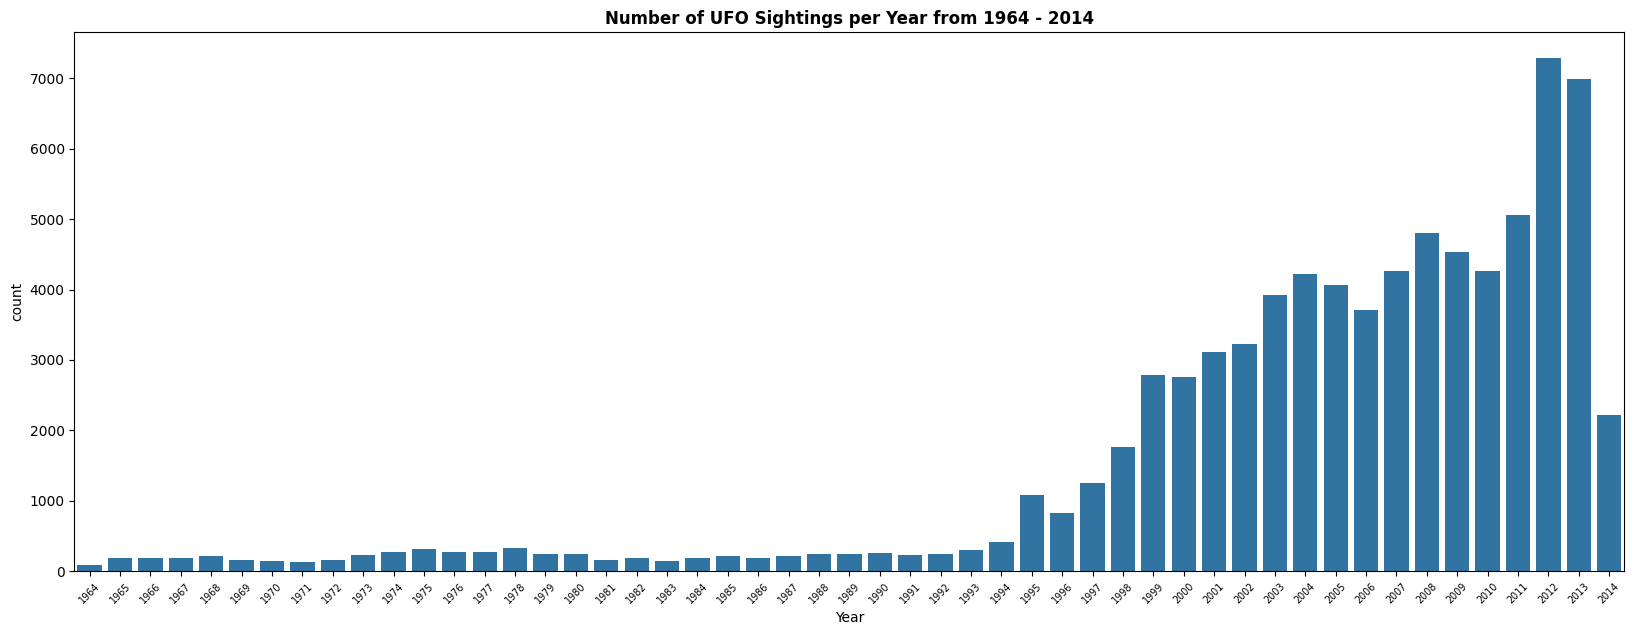

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plot = sns.countplot(data=merged_df[merged_df['Year'] >= 1964], x='Year', orient='v')
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
plot.set_title('Number of UFO Sightings per Year from 1964 - 2014', fontdict = {'size': 12, 'weight':'bold'})

aAs seen in the count plot above, the total number of UFO sightings grows exponentially after 1994. One could argue that better access to more ways of reporting such as email, phone and the internet, UFO sightings were more regularly documented; however the number of sightings reported does not consistently increase as technology became more readily available. Perhaps this is most notable in the drastic decline in reported UFO activity from 2013 to 2014; potentially suggesting that there could be less obvious factors impacting the number of reports each year.

Text(0.5, 1.0, 'Number of Alien-Related Books Published per Year from 1964 - 2014')

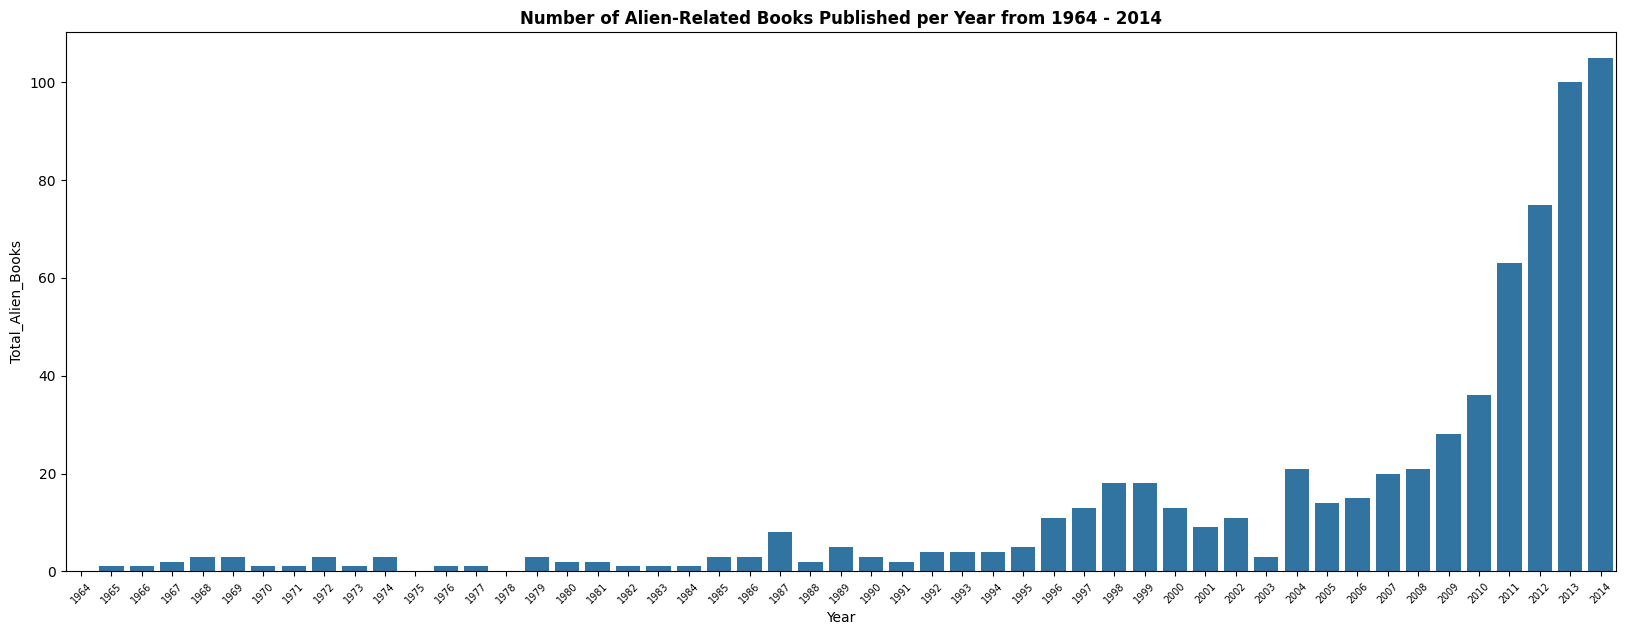

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plot = sns.barplot(data=merged_df[merged_df['Year'] >= 1964], x='Year', y='Total_Alien_Books')
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
plot.set_title('Number of Alien-Related Books Published per Year from 1964 - 2014', fontdict = {'size': 12, 'weight':'bold'})

Similar to the last plot, we can see that the number of alien-related books published each year grows after 1994, but not at the same rate. The counts per year seems to increase rather steadily prior to decreasing around 2000. The significant drop in 2003 is abruptly followed by a surge of alien-related books in 2004 and then an exponential increase beginning in 2010. Although this graph follows a similar pattern to the one above, it is difficult to determine if the notable increase in alien-related books in the early 2010s is due to an increase in interest around the topic or an increase in number of books pusblished per year. Perhaps a more informative graph would display the proportion, rather than the number, of alien-related books released per year.

Text(0.5, 1.0, 'Number of Meteorites per Year from 1964 - 2014')

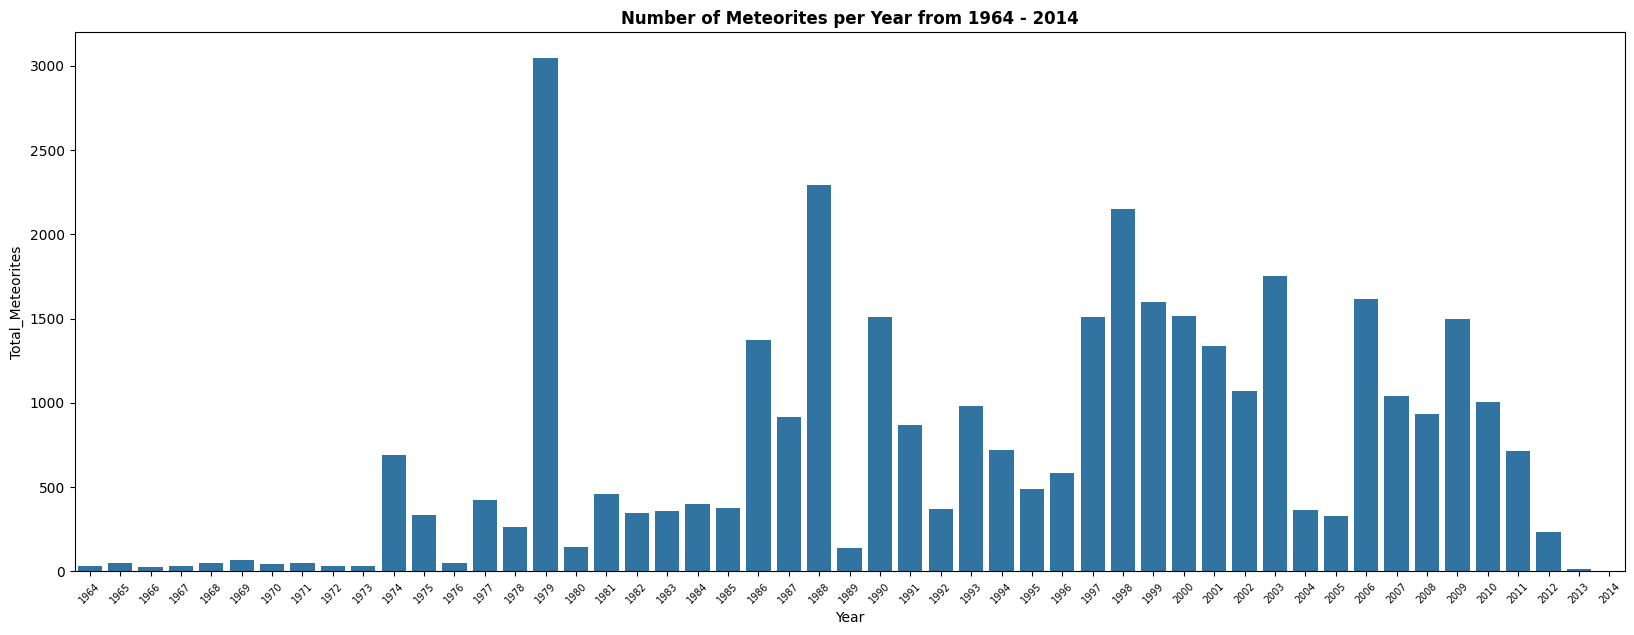

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plot = sns.barplot(data=merged_df[merged_df['Year'] >= 1964], x='Year', y='Total_Meteorites')
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
plot.set_title('Number of Meteorites per Year from 1964 - 2014', fontdict = {'size': 12, 'weight':'bold'})

Unlike the previous two plots, the number of meteorites recorded does not stay relatively the same before 1994. Instead, the number of meteorites appears to be extremely volatile, swinging from around 3000 in 1979 to nearly 200 in 1980. The lack of a distinct pattern in the plot above may suggest that there is not a strong correlation between the number of UFO sightings and the number of meteorites recorded each year but we will perform further statistical analysis to decide.

## Linear Regression - Relationship Between UFO Sightings and Alien Books Released

Text(0.5, 0, 'Total Number of Alien Books Released in a Year')

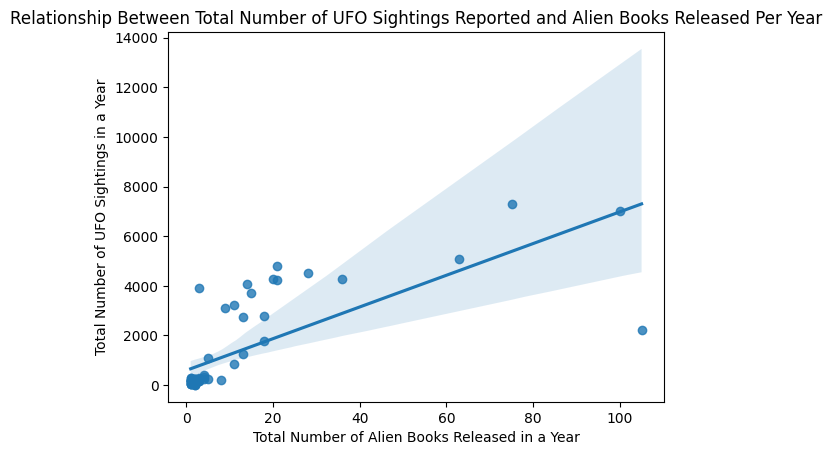

In [ ]:
# investigate the relationship between total number of UFO sightings reported and alien books released each year
year_count = merged_df[merged_df['Year'] >= 1941].groupby('Year')['datetime'].count().reset_index(name='Total_UFO')
book_sightings_df = year_count.merge(merged_df[['Total_Alien_Books', 'Year']], on='Year', how='inner').drop_duplicates().dropna()
book_sightings_plt = sns.regplot(data=book_sightings_df, x='Total_Alien_Books', y= 'Total_UFO')
book_sightings_plt.set_title("Relationship Between Total Number of UFO Sightings Reported and Alien Books Released Per Year")
book_sightings_plt.set_ylabel("Total Number of UFO Sightings in a Year")
book_sightings_plt.set_xlabel("Total Number of Alien Books Released in a Year")

In [ ]:
# perform simple linear regression between total number of UFO sightings and total number of alien books each year
book_model = smf.ols(f'Total_UFO ~ Total_Alien_Books', data=book_sightings_df).fit()
book_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_UFO   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     65.29
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           5.06e-11
Time:                        03:17:53   Log-Likelihood:                -506.80
No. Observations:                  59   AIC:                             1018.
Df Residuals:                      57   BIC:                             1022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           595.7235    195.231      3.051      0.003     204.780     986.667
Total_Alien_Books    63.8501      7.902      8.080      0.000      48.026      79.674
==============================================================================
Omnibus:                        9.491   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               23.500
Skew:                           0.049   Prob(JB):                     7.89e-06
Kurtosis:                       6.090   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the regression plot above and the ordinary least squares results suggest that there is a positive correlation between the number of UFO sightings and the number of alien-related books released each year and according to the r-squared value, 53.4% of variation in the UFO sightings can be explained by this model. Additionally, the probability f-statistic is much less than 0.05, implying that this relationship is statistically significant.

## Linear Regression - Relationship Between UFO Sightings and Meteorites

Text(0.5, 0, 'Total Number of Meteorites in a Year')

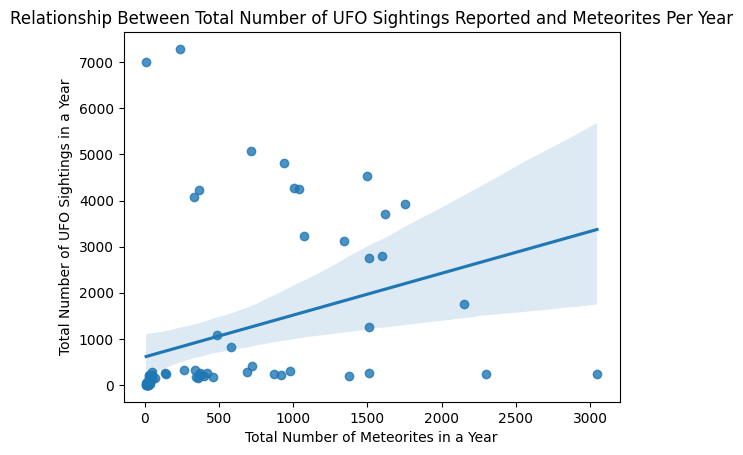

In [ ]:
# investigate the relationship between total number of UFO sightings reported and meteorites each year
meter_sightings_df = year_count.merge(merged_df[['Total_Meteorites', 'Year']], on='Year', how='inner').drop_duplicates().dropna()
meter_sightings_plt = sns.regplot(data=meter_sightings_df, x='Total_Meteorites', y= 'Total_UFO')
meter_sightings_plt.set_title("Relationship Between Total Number of UFO Sightings Reported and Meteorites Per Year")
meter_sightings_plt.set_ylabel("Total Number of UFO Sightings in a Year")
meter_sightings_plt.set_xlabel("Total Number of Meteorites in a Year")

In [ ]:
# perform simple linear regression between total number of UFO sightings and total number of meteorites
meter_model = smf.ols(f'Total_UFO ~ Total_Meteorites', data=meter_sightings_df).fit()
meter_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_UFO   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     9.104
Date:                Tue, 19 Mar 2024   Prob (F-statistic):            0.00354
Time:                        03:17:53   Log-Likelihood:                -645.70
No. Observations:                  73   AIC:                             1295.
Df Residuals:                      71   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          608.2487    250.181      2.431      0.018     109.402    1107.096
Total_Meteorites     0.9072      0.301      3.017      0.004       0.308       1.507
==============================================================================
Omnibus:                       42.689   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.594
Skew:                           2.001   Prob(JB):                     4.33e-24
Kurtosis:                       7.399   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Upon analyzing the regression plot above and the ordinary least squares results, there appears to be a positive correlation between the number of UFO sightings and the number of meteorites recorded each year. Compared to the previous model, this OLS equation has a much smaller r-squared value (0.193), suggesting that a model which uses the number of meteorites recorded does not capture the variability in the number of UFO sightings as well as a model which uses alien-book count as its predictor variable. That being said, the probability f-statistic is still less than 0.05, implying that this relationship is also statistically significant.

## Heatmaps - Distribution of UFO Reports Over the Months

Following the meteorologist argument for UFO sightings, we may be interested in investigating what impact weather conditions have on the number of UFO sightings reported. Prior to joining international weather data to our current analysis, we want to first determine if we can identify an inherent pattern in the number of UFO sightings reported over the span of a year as a result of the natural change in seasons. In order to visualize this relationship, we can group the records of UFO sightings in our final merged DataFrame by year and then obtain the proportion of UFO sightings that occurred each month through normalization. Applying this process to a span of years and representing these calculations via a heat map allows us to easily detect a pattern (or a lack-there-of) between the number of UFO reports across the months and help us decide if considering weather conditions is worth our time.

In [ ]:
# understand what months seem to be most commonly assoicated with high levels of UFO sightings
def produce_heatmap(df, tag=''):
    '''
    Produce a heatmap and pivot table to represent the proportion of UFO sightings reported each month
    out of the total number of UFO sightings that year over the span of multiple years.
    '''
    df['Month_Name'] = pd.to_datetime(df['datetime']).apply(lambda x:x.strftime('%B'))
    df = df.groupby('Year')["Month_Name"].value_counts(normalize=True).reset_index(name='proportions')
    pivot_proportions = df.pivot_table(index='Month_Name', columns='Year', values='proportions').fillna(0)
    months_ordered = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
    pivot_proportions = pivot_proportions.reindex(months_ordered)
    ax = plt.axes()
    sns.heatmap(pivot_proportions, cmap="Blues", vmax=0.2, vmin=0, annot=True,
                fmt=".2f", annot_kws={"size": 6}, ax=ax)
    ax.set_title(f'Proportion of UFO Reports Per Month During Each Year From 1998 - 2013{tag}', fontdict = {'size': 12, 'weight':'bold'})
    plt.show()
    return pivot_proportions


/tmp/ipykernel_659/3960307386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Name'] = pd.to_datetime(df['datetime']).apply(lambda x:x.strftime('%B'))


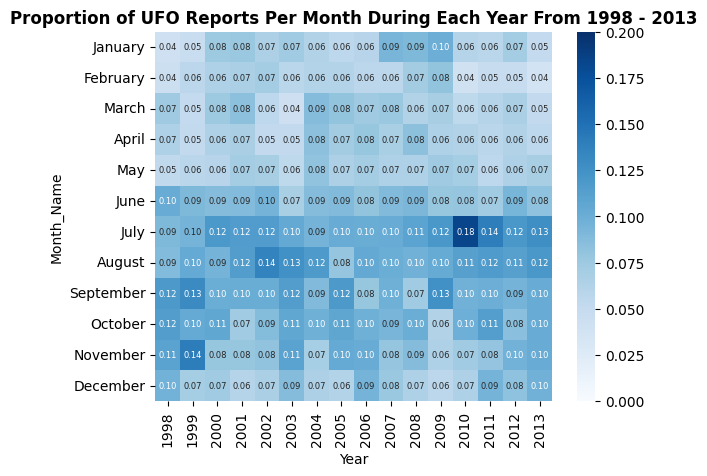

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month_Name,,,,,,,,,,,,,,,,
January,0.042022,0.047653,0.075335,0.077022,0.065818,0.073065,0.062692,0.056047,0.059758,0.093471,0.090474,0.099978,0.060755,0.058463,0.071772,0.051179
February,0.044293,0.056969,0.064469,0.066752,0.071717,0.058299,0.062456,0.062193,0.056258,0.056599,0.071963,0.080998,0.039643,0.048588,0.048168,0.037598
March,0.074390,0.051236,0.075697,0.084082,0.055573,0.043024,0.086823,0.080629,0.074293,0.077266,0.062604,0.068859,0.055125,0.060636,0.066557,0.052895
April,0.065304,0.051594,0.064832,0.067394,0.053089,0.051680,0.083984,0.072271,0.078331,0.068107,0.084027,0.064886,0.063101,0.058068,0.063126,0.055611
May,0.053379,0.058044,0.059761,0.071566,0.069233,0.055244,0.081855,0.066372,0.071602,0.065054,0.065100,0.074597,0.071077,0.055698,0.064498,0.069478
June,0.101647,0.090290,0.087287,0.088896,0.095312,0.068483,0.087296,0.089479,0.080754,0.089713,0.091930,0.078349,0.079287,0.072684,0.094415,0.082773
July,0.090290,0.095306,0.119160,0.116175,0.116113,0.104379,0.094630,0.102262,0.100942,0.101926,0.109609,0.119841,0.184143,0.140036,0.120214,0.127234
August,0.088586,0.103547,0.094893,0.115212,0.135983,0.125764,0.117341,0.079154,0.104441,0.100047,0.097130,0.102406,0.112128,0.117124,0.112392,0.120229
September,0.118115,0.129703,0.100326,0.101091,0.100900,0.115326,0.089189,0.117994,0.078331,0.097698,0.074043,0.125579,0.097115,0.099743,0.094689,0.101644


In [ ]:
# truncate the data to only look at the UFO reports between 1998 and 2013
merged_df_trunc = merged_df[(merged_df["Year"] >= 1998) & (merged_df["Year"] < 2014)]
produce_heatmap(merged_df_trunc)

In the heat plot displayed above, we chose to look at years between 1998 and 2013 because this selection of years had the greatest number of UFO sightings to consider (as determined by our count plot earlier). From this plot, we can glean that July, August and September seem to be the most common months for UFO sightings. Seasonally, these months are considered mid to late-summer or early-autumn here in the US, but it is important to remember that our DataFrame includes international UFO reports, thus it may be in our best interest to split our dataset into two groups based on latitude. Since countries in the Southern hemisphere have opposite seasons compared to the Northern hemisphere, it seems more accurate to consider these records separately when considering if UFO report trends have a relationship with weather conditions.

In [ ]:
# add a hemisphere column to dataframe that distringuishes between northern and southern hemisphere locations
merged_df['Hemisphere'] = np.where(merged_df['latitude'] > 0, "Northern", "Southern")

In [ ]:
# compare the distribution of UFO sightings per month between Northern and Southern hemispheres to understand if the
# variation in pattern might be weather related
merged_df_trunc_north = merged_df[(merged_df["Year"] >= 1998) & (merged_df["Year"] < 2014) & (merged_df["Hemisphere"] == "Northern")]
merged_df_trunc_south = merged_df[(merged_df["Year"] >= 1998) & (merged_df["Year"] < 2014) & (merged_df["Hemisphere"] == "Southern")]

/tmp/ipykernel_659/3960307386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Name'] = pd.to_datetime(df['datetime']).apply(lambda x:x.strftime('%B'))


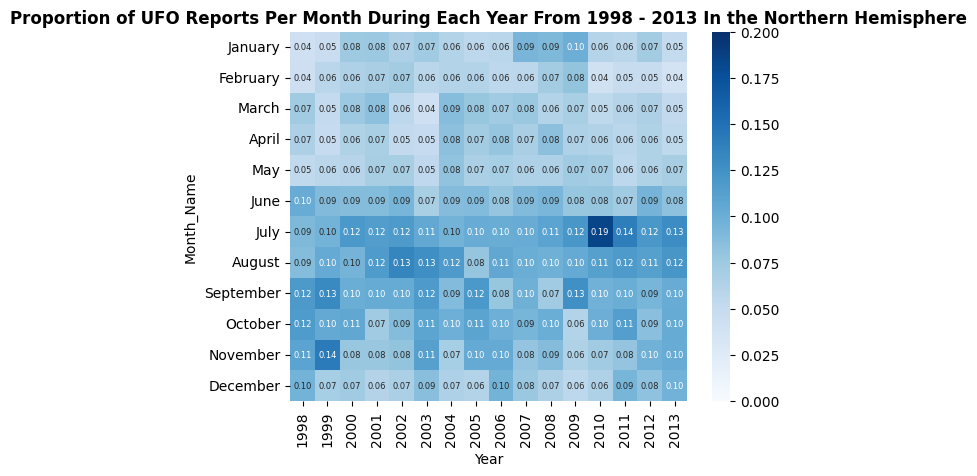

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month_Name,,,,,,,,,,,,,,,,
January,0.042002,0.046461,0.075285,0.076066,0.065693,0.072974,0.062139,0.055556,0.058210,0.093090,0.089954,0.099933,0.060520,0.057421,0.072021,0.050801
February,0.043153,0.057350,0.064635,0.067541,0.072041,0.057858,0.062380,0.062312,0.056013,0.056756,0.071879,0.081196,0.039480,0.048679,0.047830,0.037235
March,0.073648,0.051543,0.076386,0.083607,0.055855,0.041699,0.086705,0.078579,0.073311,0.076941,0.062421,0.068704,0.054846,0.060600,0.066077,0.052100
April,0.066168,0.050454,0.063900,0.068197,0.052364,0.050560,0.084297,0.072322,0.079077,0.067917,0.083859,0.065135,0.062648,0.058017,0.063312,0.054986
May,0.053510,0.057713,0.059860,0.069508,0.069502,0.054209,0.081407,0.067067,0.070291,0.064830,0.064313,0.074058,0.071395,0.055633,0.063865,0.069274
June,0.101841,0.089292,0.087404,0.087541,0.094256,0.068022,0.086946,0.088839,0.079627,0.089290,0.092266,0.078519,0.079433,0.072720,0.094553,0.082840
July,0.090334,0.095463,0.118986,0.115082,0.117423,0.105291,0.095376,0.102102,0.101318,0.101639,0.109500,0.120455,0.185106,0.140274,0.120127,0.128157
August,0.088032,0.103811,0.095116,0.117049,0.134878,0.126922,0.117534,0.079329,0.105711,0.100451,0.097940,0.103279,0.112530,0.117425,0.112801,0.121374
September,0.118527,0.130672,0.100624,0.102951,0.102507,0.117279,0.088873,0.118869,0.078803,0.098076,0.073770,0.126255,0.097636,0.100139,0.094415,0.101746


In [ ]:
produce_heatmap(merged_df_trunc_north, tag=' In the Northern Hemisphere')

/tmp/ipykernel_659/3960307386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Name'] = pd.to_datetime(df['datetime']).apply(lambda x:x.strftime('%B'))


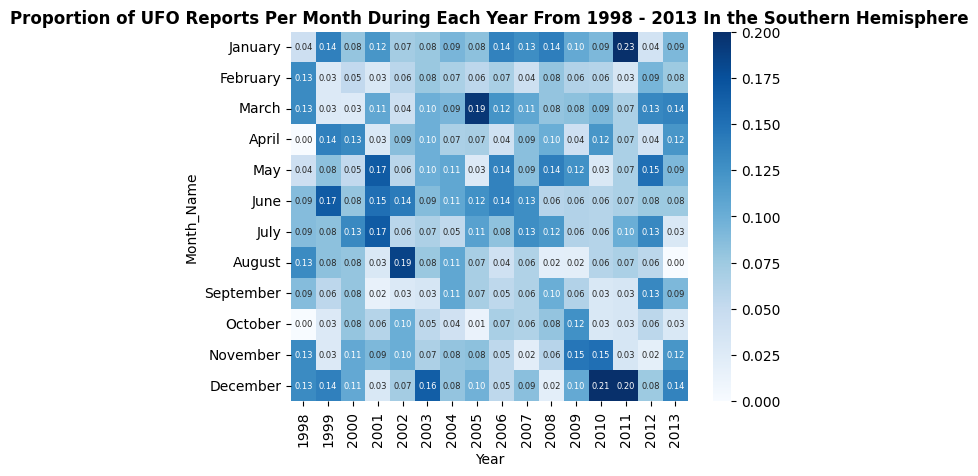

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month_Name,,,,,,,,,,,,,,,,
January,0.043478,0.138889,0.078947,0.121212,0.071429,0.076923,0.093333,0.083333,0.136986,0.127660,0.14,0.104167,0.090909,0.233333,0.037736,0.090909
February,0.130435,0.027778,0.052632,0.030303,0.057143,0.076923,0.066667,0.055556,0.068493,0.042553,0.08,0.062500,0.060606,0.033333,0.094340,0.075758
March,0.130435,0.027778,0.026316,0.106061,0.042857,0.098901,0.093333,0.194444,0.123288,0.106383,0.08,0.083333,0.090909,0.066667,0.132075,0.136364
April,0.000000,0.138889,0.131579,0.030303,0.085714,0.098901,0.066667,0.069444,0.041096,0.085106,0.10,0.041667,0.121212,0.066667,0.037736,0.121212
May,0.043478,0.083333,0.052632,0.166667,0.057143,0.098901,0.106667,0.027778,0.136986,0.085106,0.14,0.125000,0.030303,0.066667,0.150943,0.090909
June,0.086957,0.166667,0.078947,0.151515,0.142857,0.087912,0.106667,0.125000,0.136986,0.127660,0.06,0.062500,0.060606,0.066667,0.075472,0.075758
July,0.086957,0.083333,0.131579,0.166667,0.057143,0.065934,0.053333,0.111111,0.082192,0.127660,0.12,0.062500,0.060606,0.100000,0.132075,0.030303
August,0.130435,0.083333,0.078947,0.030303,0.185714,0.076923,0.106667,0.069444,0.041096,0.063830,0.02,0.020833,0.060606,0.066667,0.056604,0.000000
September,0.086957,0.055556,0.078947,0.015152,0.028571,0.032967,0.106667,0.069444,0.054795,0.063830,0.10,0.062500,0.030303,0.033333,0.132075,0.090909


In [ ]:
produce_heatmap(merged_df_trunc_south, tag=' In the Southern Hemisphere')

Upon splitting the 

## Geoplot - Total UFO Sightings Per State

In [ ]:
merged_df['country'].value_counts()

country
us    64828
ca     2986
gb     1883
au      527
de      104
Name: count, dtype: int64

According to our data, the United States recorded 64,828 UFO sightings between 1906 and 2014, a number that exceeds its predecessor, Canada, by over 60,000. Given this fact, we aim to understand the distribution of UFO sighting reports among the US states. Which states contributed the most to 64,828 sightings? Which states contributed the least? Does there appear to be a relationship between geographical region and the number of UFO sightings reported? In order to explore these questions, we will create a geoplot.

In [ ]:
ufo_state_df = merged_df[(merged_df.country == 'us') & (merged_df.state != 'dc') & (merged_df.state != 'pr')]['state'].value_counts().reset_index(name='ufo_state')

In [ ]:
# pull a shapefile of US state outlines using wget()
# wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

# read in shapefile using geopandas
gdf = gpd.read_file('/work/20240223-190850/cb_2018_us_state_500k.shp')

# convert state abbreviations to lowercase
gdf['STUSPS'] = gdf['STUSPS'].str.lower()

# merge gdf to dataframe of interest on state abbreviation
gdf = gdf.merge(ufo_state_df,left_on='STUSPS',right_on='state')

/shared-libs/python3.9/py/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/shared-libs/python3.9/py/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


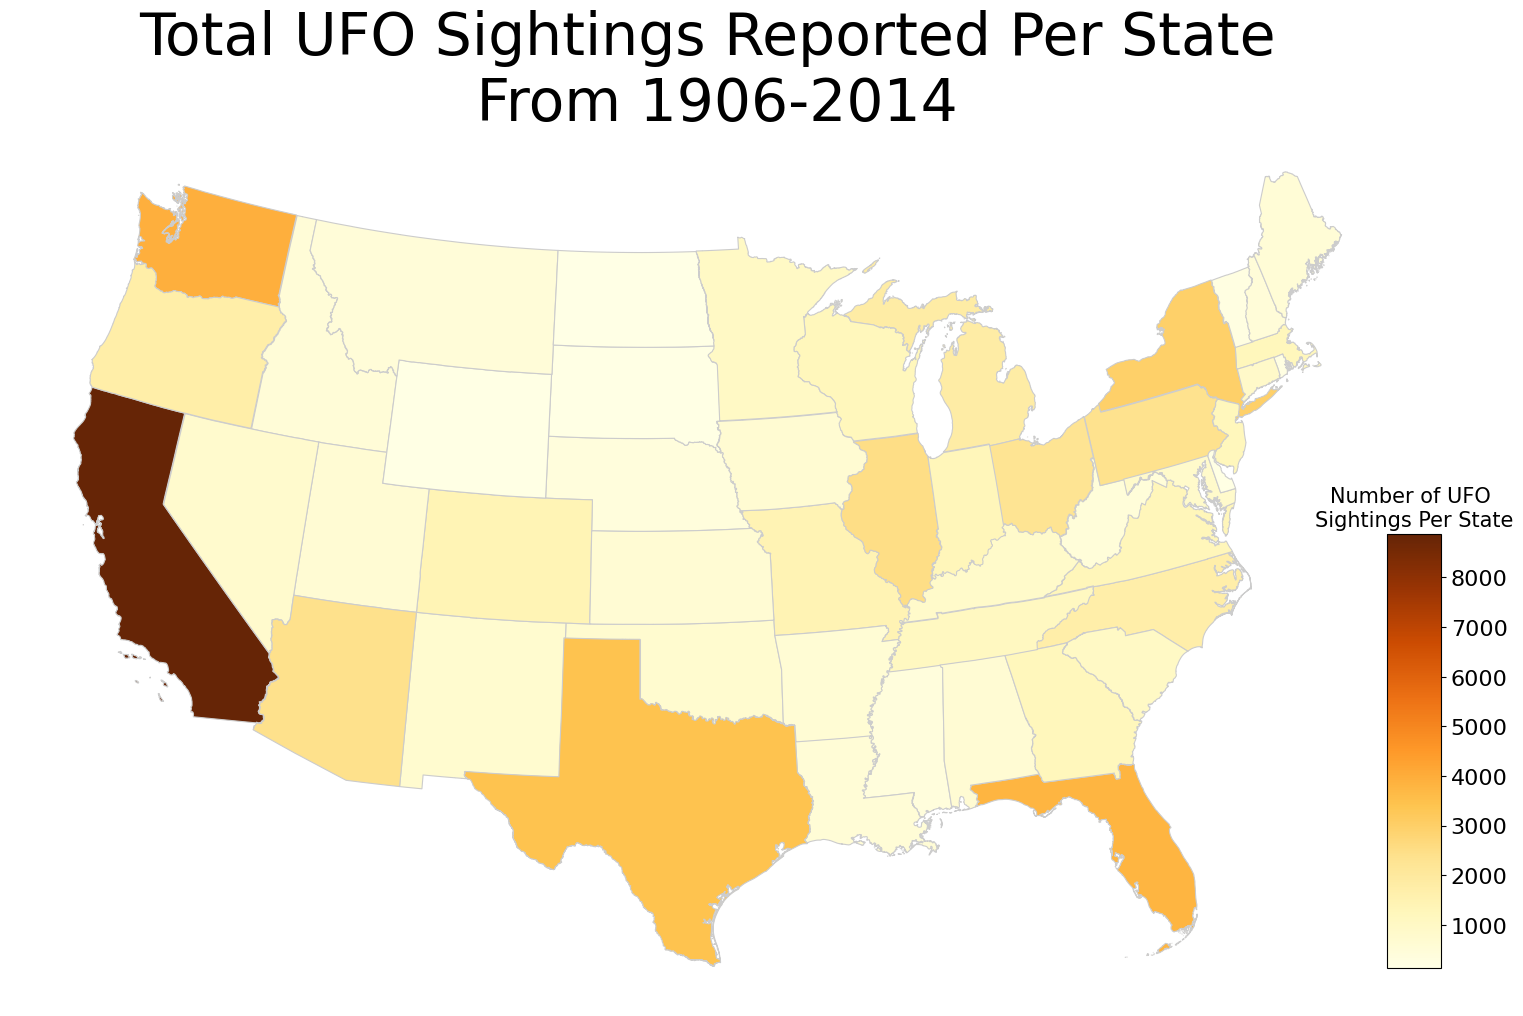

In [ ]:
# apply this function to the gdf to ensure all states are assigned colors by the same func
def makeColorColumn(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

# re-project coordinates for any of the components of our map using the geopandas command .to_crs()
gdf.to_crs({'init':'epsg:2163'})

# set the value column that will be visualised
variable = 'ufo_state'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf.ufo_state.min(), gdf.ufo_state.max() 
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "YlOrBr"
gdf = makeColorColumn(gdf,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163 for CONUS
visframe = gdf.to_crs({'init':'epsg:2163'})

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# add a title and annotation
ax.set_title('Total UFO Sightings Reported Per State\n From 1906-2014', fontdict={'fontsize': '42', 'fontweight' : '1'})

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Number of UFO \nSightings Per State', fontdict={'fontsize': '15', 'fontweight' : '0'})

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
#comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
fig.colorbar(sm, cax=cbax) # format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)


# create map
# Going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.state not in ['ak','hi']:
        vf = visframe[visframe.state==row.state]
        c = gdf[gdf.state==row.state][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')


Based on the information visually represented by the geoplot above, it is apparent that California reported the greatest number of UFOs between the years of 1906 and 2014, followed by Washington, Florida, Texas, and New York while North Dakota, Delaware and Wyoming appear to have reported the fewest number of UFO sightings. It is worth noting that these values are not per capita (i.e. they do not consider the size of each state's population) however, this knowledge can still be wielded to inform and improve our analysis. The top five states do not appear to have a strong geographical correlation apart from the fact that they are all near a coastline. This fact could leads to reject the idea that a certain spot or general region of America is most frequently targeted by aliens and encourage us to pursue other commonly factors. Some features we might like to consider, such as use of hallucinogens among a population, are not available for every location or year in full our dataset. By sub selecting the states in which UFO reports are historically great or low and investigating trends and patterns over the years and among these selected states could potentially lead to nuanced results that could be further generalized to further our understanding and ultimately improve our prediction model

## Bar Plot - Top 15 words in the 'comments' column from the UFO Sightings dataset (after removing stop words)

In [ ]:
# Download stopwords from nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
comments = ' '.join(merged_df['comments'].dropna())

In [ ]:
words = word_tokenize(comments)

In [ ]:
# Filter out stopwords and non-alphabetic words
stop_words = set(stopwords.words('english'))
words_filtered = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

In [ ]:
# Count the frequency of each word
word_freq = pd.Series(words_filtered).value_counts()

In [ ]:
# Select the top 15 most common words
top_words = word_freq.head(15)

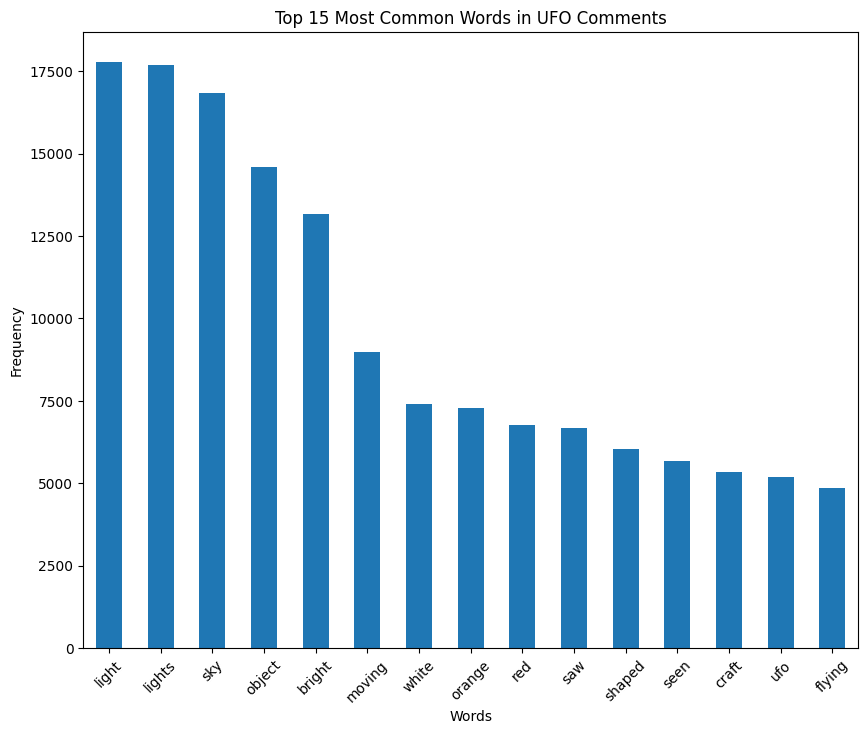

In [ ]:
# Plot
plt.figure(figsize=(10, 8))
top_words.plot(kind='bar')
plt.title('Top 15 Most Common Words in UFO Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Interpretation: The word "light" appears to be the most frequently (~17500) occurring word among the comments, followed closely by "lights" and "sky", which suggests that many comments may be describing sightings involving lights in the sky. The words "object" and "bright" also have a high frequency, indicating that descriptions often refer to objects that are bright. This aligns with common UFO reports that describe bright objects or phenomena.

# References

$^{1,2}$ History.com Editors. "History of UFOs". Last Modified September 11, 2019. https://www.history.com/topics/paranormal/history-of-ufos. 
$^3$ "UFOs and Aliens Among Us". Library of Congress. https://www.loc.gov/collections/finding-our-place-in-the-cosmos-with-carl-sagan/articles-and-essays/life-on-other-worlds/ufos-and-aliens-among-us

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a95c9e9-3cb6-41d1-9181-3dc8f009dd81' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>